In [1]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [2]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

In [3]:
df.plot = gapminder %>% 
    filter(year %in% c('1952', '2002'))

In [5]:
df.1952.kuwait %>% head

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Kuwait,Asia,1952,55.565,160000,108382.4


In [6]:
df.2002.kuwait %>% head

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Kuwait,Asia,2002,76.904,2111561,35110.11


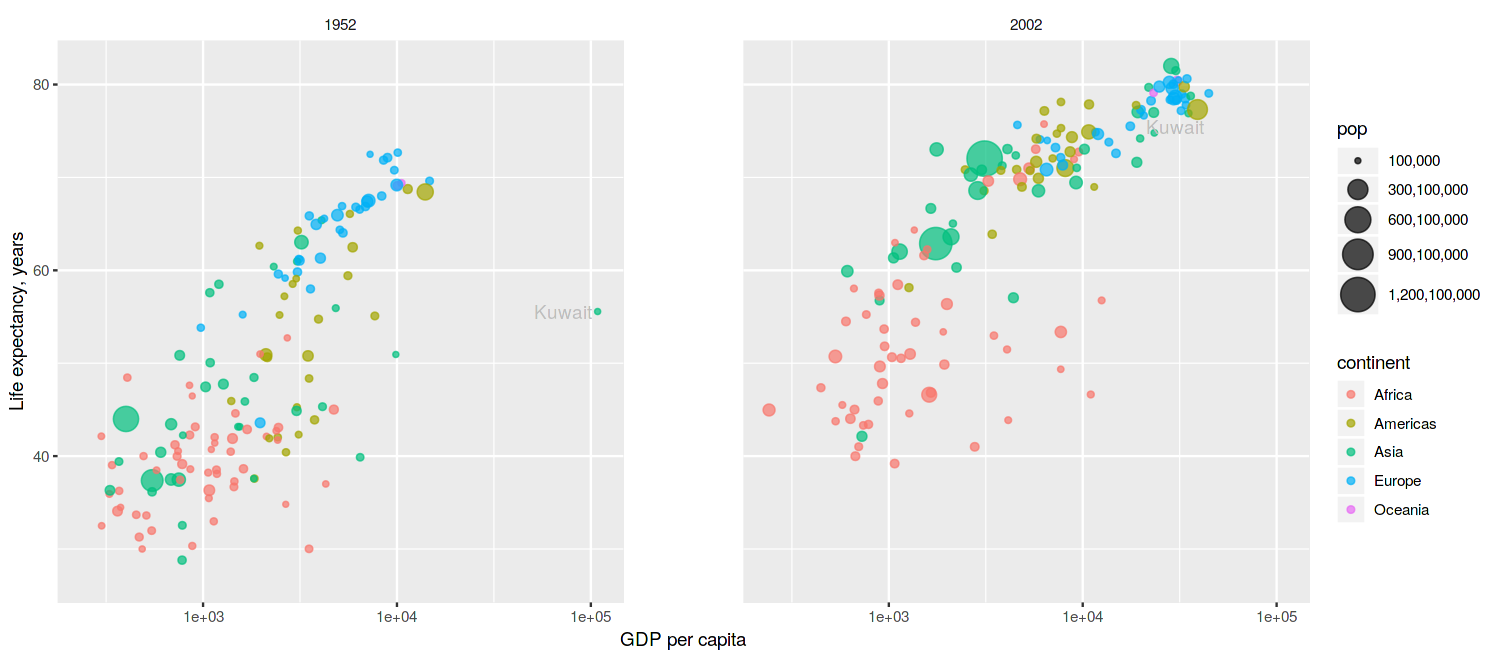

In [25]:
options(repr.plot.width = 12.5, repr.plot.height = 5.5)

p = ggplot(df.plot, aes(x = gdpPercap, y = lifeExp, color = continent)) + geom_point(aes(size = pop), alpha = 0.7) 

p = p + facet_wrap(~year, ncol = 2) + theme(panel.spacing = unit(5, "lines"))

p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

p = p + ylim(c(27, 82))

p = p + scale_x_log10()

p = p + theme(legend.position = 'right',
              strip.background = element_blank())

p = p + labs(y = 'Life expectancy, years', x = 'GDP per capita')

p = p + geom_text_repel(
    data = df.1952.kuwait,
    mapping = aes(x = gdpPercap, y = lifeExp, label = "Kuwait"),
    color = 'gray')

p = p + geom_text_repel(
    data = df.2002.kuwait,
    mapping = aes(x = gdpPercap, y = lifeExp, label = "Kuwait"),
    color = 'gray')

p

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!